In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/geekhaven-ml-wing-recruitment'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_df=pd.read_csv("/content/train.csv");
train_df.head();

In [ ]:
train_df

,Sr No.,Utterance,Speaker,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Emotion
0,2919,Why don’t we do a trial run.,Supervisor,neutral,308,2,7,13,"00:04:25,014","00:04:28,141",neutral
1,12609,Y’know I don’t understand why they didn’t cry....,Ross,negative,163,0,8,18,"00:21:14,261","00:21:18,014",sadness
2,12880,Could've been a peach.,Chandler,neutral,188,6,1,4,"00:07:08,428","00:07:11,138",neutral
3,359,Uh-huh. But it was a first for the rest of my ...,Ross,neutral,34,7,5,23,"00:14:48,386","00:14:49,386",neutral
4,4813,This will be your phone.,Stage Director,neutral,514,1,5,4,"00:07:24,777","00:07:26,403",neutral
...,...,...,...,...,...,...,...,...,...,...,...
9590,13635,"Oh, I uh, just came by to pick up my skull. We...",Ross,neutral,270,2,1,9,"00:04:55,253","00:05:02,884",neutral
9591,7993,And any extra cash my father has he saves for ...,Chandler,neutral,843,3,7,2,"00:12:39,508","00:12:44,220",neutral
9592,8636,"No! No-no. Look, there’s a bug stuck in tar ri...",Joey,positive,908,6,7,12,"00:02:36,156","00:02:39,867",surprise
9593,3570,Wow! Nice! Manly and also kind of a slut.,Phoebe,negative,376,3,7,22,"00:15:59,208","00:16:03,836",fear


In [ ]:
test_df=pd.read_csv("/content/test.csv")

In [ ]:
test_df

,Sr No.,Utterance,Speaker,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,8267,"And before you know it, she's with him.",Joey,negative,869,11,3,12,"00:13:09,455","00:13:11,456"
1,6211,"Oh, oh, but y'know, you always see these reall...",Phoebe,neutral,652,13,1,6,"00:02:40,335","00:02:46,582"
2,10948,"Oh yeah? Hi, Ken Adams, nice to meet you.",Joey,neutral,95,3,8,4,"00:12:50,394","00:12:54,147"
3,8438,"But-but, Liam’s on my team.",Ross,positive,888,16,4,15,"00:17:03,355","00:17:05,064"
4,3190,Oh God!,Monica,negative,336,11,3,10,"00:12:48,184","00:12:49,225"
...,...,...,...,...,...,...,...,...,...,...
4108,3920,"Yeah, Ross is great.",Monica,neutral,423,1,1,23,"0:11:29,606","0:11:32,260"
4109,7896,I don’t know. Me neither.,Phoebe,neutral,834,15,6,12,"00:04:43,283","00:04:47,286"
4110,11828,"I mean I’ll have to check with him first, but ...",Joey,neutral,80,9,4,4,"00:07:19,522","00:07:22,065"
4111,3253,"All right. Chandler, you can either spin the w...",Joey,neutral,342,9,8,20,"00:07:52,919","00:07:56,672"


In [ ]:
train_df[["Sr No.","Utterance","Emotion"]]

,Sr No.,Utterance,Emotion
0,2919,Why don’t we do a trial run.,neutral
1,12609,Y’know I don’t understand why they didn’t cry....,sadness
2,12880,Could've been a peach.,neutral
3,359,Uh-huh. But it was a first for the rest of my ...,neutral
4,4813,This will be your phone.,neutral
...,...,...,...
9590,13635,"Oh, I uh, just came by to pick up my skull. We...",neutral
9591,7993,And any extra cash my father has he saves for ...,neutral
9592,8636,"No! No-no. Look, there’s a bug stuck in tar ri...",surprise
9593,3570,Wow! Nice! Manly and also kind of a slut.,fear


In [ ]:
minimum_sr_value_test=len(test_df["Sr No."]);
minimum_sr_value_train=len(train_df["Sr No."]);

In [ ]:
minimum_sr_value_test

4113

In [ ]:
minimum_sr_value_train

9595

In [ ]:
common_elements_df = train_df.merge(test_df, on='Sr No.' , how='inner');
common_elements_df


,Sr No.,Utterance_x,Speaker_x,Sentiment_x,Dialogue_ID_x,Utterance_ID_x,Season_x,Episode_x,StartTime_x,EndTime_x,Emotion,Utterance_y,Speaker_y,Sentiment_y,Dialogue_ID_y,Utterance_ID_y,Season_y,Episode_y,StartTime_y,EndTime_y


In [ ]:
emotion_counts=train_df["Emotion"].value_counts();
Sentiment_counts=train_df["Sentiment"].value_counts();

In [ ]:
print(Sentiment_counts)
emotion_counts


neutral     4441
negative    2989
positive    2165
Name: Sentiment, dtype: int64


neutral     4441
joy         1626
anger       1164
surprise    1136
sadness      715
fear         258
disgust      255
Name: Emotion, dtype: int64

In [ ]:
# In machine learning raandomization is an important task
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # random index +5 must not exceed the length of train_df that would lead to error
for row in train_df_shuffled[["Utterance", "Emotion"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: neutral
Text:
Hey, what about the scene with the kangaroo? Did-did you like that part?

---

Target: surprise
Text:
Really?

---

Target: anger
Text:
That only is not funny, it's physically impossible!

---

Target: neutral
Text:
Joey, we

---

Target: joy
Text:
We did have fun, didn't we?

---



In [ ]:
import tensorflow as tf

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df_shuffled["Emotion"].to_numpy())
train_labels_encoded

array([5, 4, 3, ..., 4, 4, 3])

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["Utterance"].to_numpy(),
                                                                            train_labels_encoded,
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [ ]:
train_sentences[0:10]

array(['Chandler! Phoebe’s hogging the game!',
       'Let’s get the show on it!',
       'What happened? You still have the Monica wedding fund don’t you?',
       'Hey Pheebs!', 'Pheebs!', 'Such a pig!',
       "Thanks, Bernice.  Let's go away this weekend.",
       'Okay, I’ll see you in our room.',
       'Okay you two are asking the court for an annulment?',
       'This is about us.'], dtype=object)

In [ ]:
val_sentences[0:10]


array(['Your eyes are very pretty.',
       'Why can’t you get a girlfriend your own age?',
       'Hi Frannie, congratulations.',
       'Well y’know what they say, the 23', 'I can.',
       "You can't be a lawyer. You're eight.", 'Yeah, it’s  mine.',
       'Come on, come on, we’re-we’re-we’re lighting the candles!',
       'So I’m screwed.', 'You tell them to wait!'], dtype=object)

In [ ]:
len(train_labels_encoded)

9595

In [ ]:
len(train_labels)+len(val_labels)
# as expected we have successfully separated our validation and test dataset

9595

In [ ]:
train_labels_encoded.shape==train_sentences.shape

False

In [ ]:
train_labels_encoded.shape

(9595,)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(pd.unique(train_df_shuffled["Emotion"].to_numpy()))
trainer=pd.DataFrame({"emotion":pd.unique(train_df_shuffled["Emotion"]),
                      "encoded label":train_labels_encoded

})
trainer


,emotion,encoded label
0,sadness,5
1,neutral,4
2,joy,3
3,fear,2
4,disgust,1
5,anger,0
6,surprise,6


In [ ]:
train_labels_encoded

array([5, 4, 3, 2, 1, 0, 6])

In [ ]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
import tensorflow.keras.layers as layers
model_1 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(10, activation="softmax")
], name="model_6_USE")

# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=60,
                              validation_data=(val_sentences, val_labels),
                              )

Epoch 1/60
270/270 [==============================] - 14s 23ms/step - loss: 2.1663 - accuracy: 0.4093 - val_loss: 1.9841 - val_accuracy: 0.4781
Epoch 2/60
270/270 [==============================] - 4s 14ms/step - loss: 1.8443 - accuracy: 0.4610 - val_loss: 1.6999 - val_accuracy: 0.4781
Epoch 3/60
270/270 [==============================] - 3s 13ms/step - loss: 1.6543 - accuracy: 0.4610 - val_loss: 1.5779 - val_accuracy: 0.4781
Epoch 4/60
270/270 [==============================] - 3s 12ms/step - loss: 1.5647 - accuracy: 0.4622 - val_loss: 1.5156 - val_accuracy: 0.4802
Epoch 5/60
270/270 [==============================] - 4s 13ms/step - loss: 1.5107 - accuracy: 0.4665 - val_loss: 1.4739 - val_accuracy: 0.4885
Epoch 6/60
270/270 [==============================] - 4s 16ms/step - loss: 1.4727 - accuracy: 0.4757 - val_loss: 1.4428 - val_accuracy: 0.5021
Epoch 7/60
270/270 [==============================] - 3s 12ms/step - loss: 1.4431 - accuracy: 0.4837 - val_loss: 1.4180 - val_accuracy: 0.512

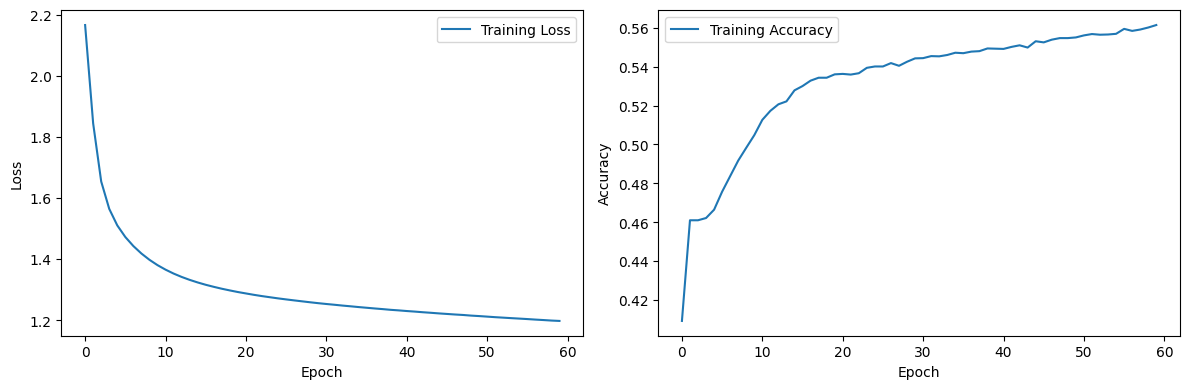

In [ ]:
import matplotlib.pyplot as plt

# Access training history
loss = model_1_history.history['loss']
val_loss = model_1_history.history['val_loss']
accuracy = model_1_history.history['accuracy']
val_accuracy = model_1_history.history['val_accuracy']

# Create subplots
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
# plt.plot(accuracy, label='Training Accuracy')
# plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


From these graphs we can see that our accuracy is increasing as our epochs are increasin so after experimenting I am increasing my epochs from 5 to 10.

**BELOW WE HAVE VISUALIZED THAT HOW IT WORKED IN OUR TEST CASES **

In [ ]:
import pandas as pd
import random
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


# Assuming you have defined train_labels_encoded and model_1

test_sentences = test_df["Utterance"].to_list()
combined_prediction_df = pd.DataFrame(columns=["Sr. No", "Emotion"])

for test in test_sentences:
    model_1_prediction_probs = tf.squeeze(model_1.predict([test]))
    emotion = train_labels_encoded[np.argmax(model_1_prediction_probs)]
    value_in_sr = test_df.loc[test_df["Utterance"] == test, "Sr No."].values[0]
    prediction_df = pd.DataFrame({
        "Sr No.": [value_in_sr],
        "Emotion": [emotion]
    })
    combined_prediction_df = pd.concat([combined_prediction_df, prediction_df], ignore_index=True)

# Now, combined_prediction_df should contain your predictions
combined_prediction_df.to_csv('combined_predictions.csv', index=False)

1/1 [==============================] - 0s 82ms/step


In [ ]:
common_elements_df = combined_predicion_df.merge(test_df, on='Sr No.' , how='inner');
common_elements_df

NameError: ignored